In [1]:
# initialise
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# read data (source: www.opensourcesports.com/basketball/)
awards = pd.read_csv('basketball_awards_players.csv')
players = pd.read_csv('basketball_players.csv', low_memory = False)

In [3]:
# breakdown of number of observations by league
print(players['lgID'].value_counts())
# filter to only show rows corresponding to the NBA
players = players[players['lgID'] == 'NBA']
awards = awards[awards['lgID'] == 'NBA']

NBA     20357
ABA      1463
NBL      1423
ABL1      205
PBLA      165
NPBL      138
Name: lgID, dtype: int64


In [4]:
# remove columns not relevant to research question
players = players.drop(['stint','tmID','lgID','GS','note'], axis=1)
awards = awards.drop(['lgID','note', 'pos'], axis=1)

# remove variables corresponding to postseason stats
cols = [c for c in players.columns if c[:4] != 'Post']
players = players[cols]

# remove players with zero games played in any given year
players = players[players['GP'] != 0]

In [5]:
# checking for sum of stats by year that equal zero
stats = players.columns[3:]   # identify all stats from players data frame
print(stats)
yearStats = players.groupby('year')[stats].sum() # sum stats by year
yearStats.head(10)

Index(['minutes', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists',
       'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade',
       'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade'],
      dtype='object')


,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
year,,,,,,,,,,,,,,,,
1946,0,44861,0,0,0,4567,0,0,0,13796,61518,17175,16397,10511,0,0
1947,0,27897,0,0,0,2697,0,0,0,8498,36911,10454,10353,6989,0,0
1948,0,57609,0,0,0,13382,0,0,0,18440,63796,20879,22562,15851,0,0
1949,0,89816,0,0,0,21996,0,0,0,30235,93221,31671,37143,26474,0,0
1950,0,51096,0,0,27847,12961,0,0,0,15754,50299,18067,20387,14962,0,0
1951,148247,51355,0,0,29749,13513,0,0,0,16211,49344,18197,20269,14961,0,0
1952,167608,56945,0,0,32022,14268,0,0,0,19812,53040,19621,24746,17703,0,0
1953,142792,47587,0,0,28017,12197,0,0,0,14911,44685,16738,19893,14111,0,0
1954,132413,51284,0,0,29115,13014,0,0,0,13677,47633,18338,19771,14608,0,0


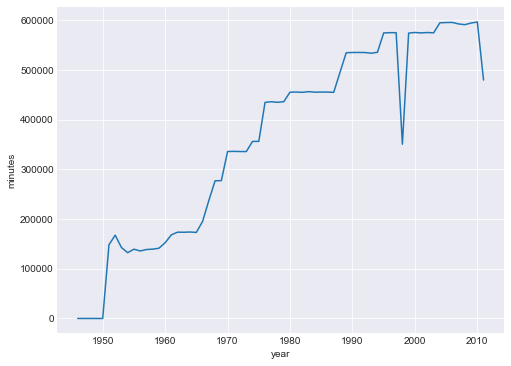

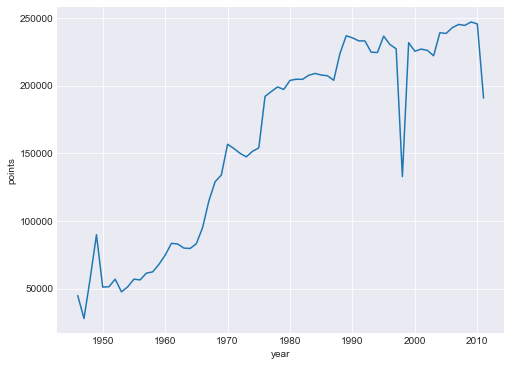

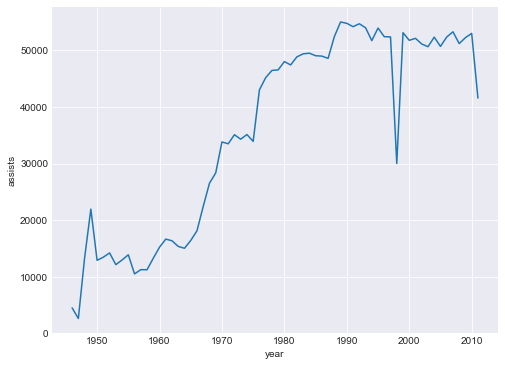

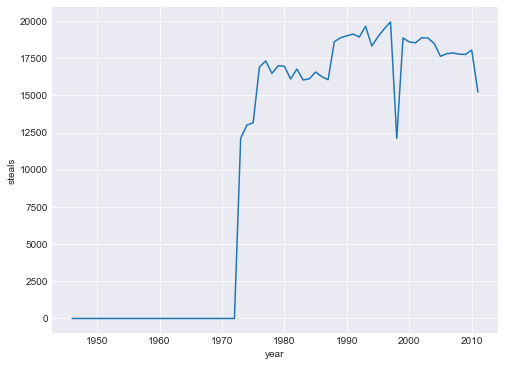

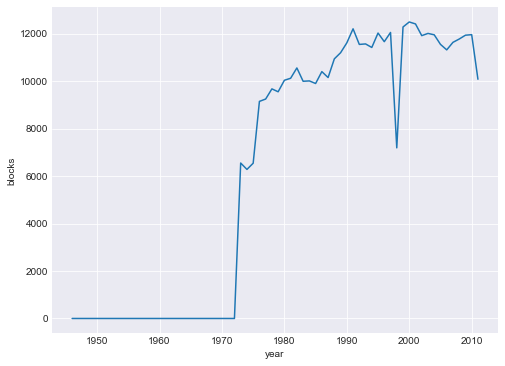

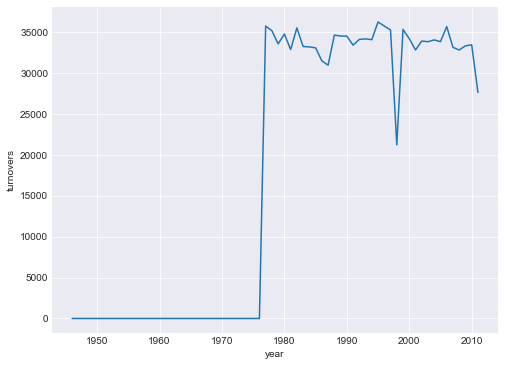

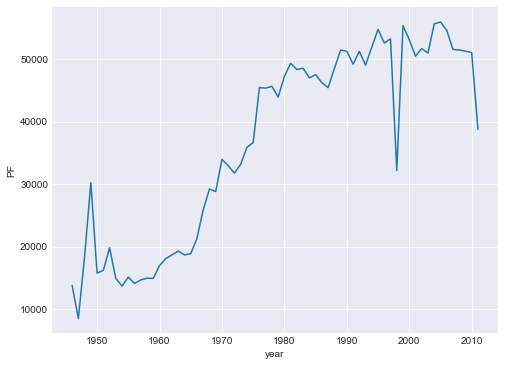

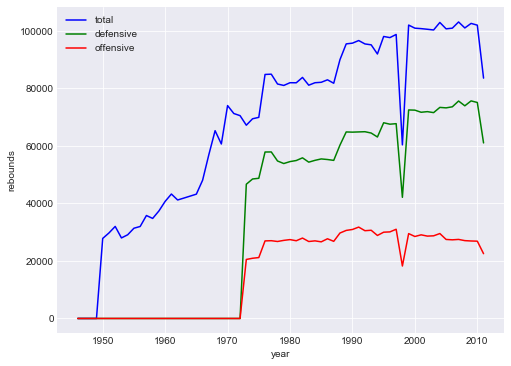

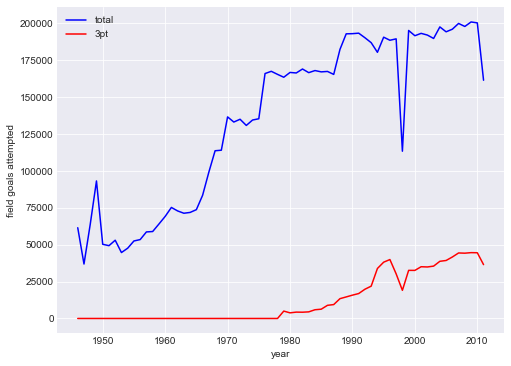

In [6]:
# visualising sum of selected stats by year
def plot_stats_by_year(statistic):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.plot(yearStats.index, yearStats[statistic])
    ax.set_xlabel('year')
    ax.set_ylabel(statistic)
    plt.show()

# plot all stats over the years
for s in stats:
    if 'rebounds' in s.lower():
        continue    # ignore rebounds (see below)
    elif 'Attempted' in s:
        continue    # ignore fg, fg, three attempts (see below)
    elif 'Made' in s:
        continue    # ignore fg, fg, three made (see below)
    else:
        plot_stats_by_year(s)
        
# plot rebounds over the years
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(yearStats.index, yearStats.rebounds, color = 'blue', label = 'total')
ax.plot(yearStats.index, yearStats.dRebounds, color = 'green', label = 'defensive')
ax.plot(yearStats.index, yearStats.oRebounds, color = 'red', label = 'offensive')
ax.set_xlabel('year')
ax.set_ylabel('rebounds')
plt.legend()
plt.show()

# plot field goal and three point attempts over the years
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(yearStats.index, yearStats.fgAttempted, color = 'blue', label = 'total')
ax.plot(yearStats.index, yearStats.threeAttempted, color = 'red', label = '3pt')
ax.set_xlabel('year')
ax.set_ylabel('field goals attempted')
plt.legend()
plt.show()

In [7]:
# remove years with incomplete stats
yearStats = yearStats[(yearStats.T != 0).all()] # remove rows with zeros
print(yearStats.head(10))

# filter players and awards datasets to only include years with complete stats
players = players[players['year'].isin(yearStats.index)]
awards = awards[awards['year'].isin(yearStats.index)]

      minutes  points  oRebounds  dRebounds  rebounds  assists  steals  \
year                                                                     
1979   436260  197239      27168      53897     81065    46567   16993   
1980   455340  203886      27437      54573     82010    48034   16964   
1981   455690  204776      27039      54948     81987    47438   16107   
1982   455090  204658      27970      55883     83853    48862   16778   
1983   456490  207668      26772      54378     81150    49397   16041   
1984   455340  209041      26999      55009     82008    49515   16122   
1985   455640  207875      26661      55500     82161    49065   16576   
1986   455590  207338      27725      55295     83020    48998   16264   
1987   455040  203993      26834      54994     81828    48599   16055   
1988   495150  223797      29724      60307     90031    52431   18619   

      blocks  turnovers     PF  fgAttempted  fgMade  ftAttempted  ftMade  \
year                               

year
1998    50
2011    66
Name: GP, dtype: int64


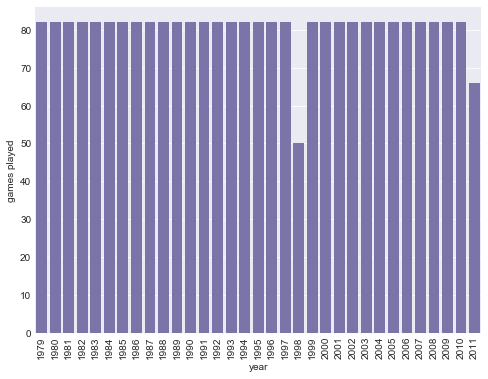

In [8]:
# determining total number of games played each year, bar plot (commented out)
totalGames = players.groupby('year')['GP'].max()
print(totalGames[totalGames != totalGames.max()])
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(totalGames.index, totalGames, color = '#756bb1')
ax.set_ylabel('games played')
ax.set_xticklabels(totalGames.index, rotation = 'vertical')
plt.show()

In [9]:
# compute average stats per game
playersPG = players.iloc[:,0:3] # select playerID, year and GP
for s in stats:
    # for each stat listed in stats, compute the avg per game
    playersPG[s] = np.divide(players[s], players['GP']).round(2)
# compute field goal, free throw and three point fg percentages
playersPG['fgPct'] = (np.divide(players['fgMade'], players['fgAttempted'])*100).round(2)
playersPG['ftPct'] = (np.divide(players['ftMade'], players['ftAttempted'])*100).round(2)
playersPG['threePct'] = (np.divide(players['threeMade'], players['threeAttempted'])*100).round(2)
print(playersPG.head(10))

       playerID  year  GP  minutes  points  oRebounds  dRebounds  rebounds  \
7234  abdulka01  1979  82    38.33   24.80       2.32       8.49     10.80   
7235  abernto01  1979  67    18.24    5.40       0.93       1.93      2.85   
7236  adamsal01  1979  75    28.91   14.91       2.11       6.01      8.12   
7237  archina01  1979  80    35.80   14.14       0.74       1.72      2.46   
7238  awtrede01  1979  26    21.54    3.31       1.12       3.31      4.42   
7239  bailegu01  1979  20     9.00    1.90       0.30       1.10      1.40   
7240  baileja01  1979  67    10.84    4.66       1.06       1.88      2.94   
7241  ballagr01  1979  82    29.73   15.57       2.93       4.85      7.78   
7242  bantomi01  1979  77    30.26   11.79       2.49       3.43      5.92   
7243  barnema01  1979  20    14.35    3.20       1.70       2.15      3.85   

      assists  steals    ...       PF  fgAttempted  fgMade  ftAttempted  \
7234     4.52    0.99    ...     2.63        16.87   10.18        

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [10]:
# summary statistics of player stats, excluding playerID and year
summaryStats = playersPG.iloc[:,2:].describe()
print(summaryStats.round(2))

             GP   minutes    points  oRebounds  dRebounds  rebounds   assists  \
count  14577.00  14577.00  14577.00   14577.00   14577.00  14577.00  14577.00   
mean      50.03     20.27      8.23       1.08       2.46      3.54      1.89   
std       27.09     10.48      6.12       0.89       1.82      2.60      1.89   
min        1.00      0.00      0.00       0.00       0.00      0.00      0.00   
25%       26.00     11.43      3.39       0.41       1.12      1.62      0.57   
50%       55.00     19.59      6.64       0.83       2.00      2.88      1.29   
75%       76.00     29.14     11.88       1.53       3.28      4.79      2.57   
max       82.00     44.50     37.09       6.99      13.00     18.66     14.54   

         steals    blocks  turnovers        PF  fgAttempted    fgMade  \
count  14577.00  14577.00   14577.00  14577.00     14577.00  14577.00   
mean       0.68      0.42       1.30      1.99         6.90      3.14   
std        0.50      0.53       0.84      0.90     

In [11]:
# define functions for player per game stats plots

def plot_hist(series):
    fig, ax = plt.subplots(figsize = (8,6))
    sns.distplot(playersPG[series], kde = False, color = 'blue', hist_kws = {'alpha': 0.8, 'edgecolor': 'black'})
    if series == 'year':
        ax.set_xlabel(series)
    elif 'Pct' in series:
        ax.set_xlabel(series)
    else:
        ax.set_xlabel(series + ' per game')
    plt.show()

def plot_pg_stat(s1, s2, annualMean = False, regLine = False, logx = False, logy = False, alpha = 0.2):
    # annualMean specifies if the avg stat per year will be added to the plot
    # regLIne specifies if a linear regression line is to be plotted
    # logx and logy specify if whether or not to take the log of those variables
    # alpha = 0.2 makes the dense scatterplots easier to see, can be altered
    temp = pd.DataFrame(playersPG[[s1, s2]])
    if logx:
        temp[s1] = np.log(temp[s1])
    if logy:
        temp[s2] = np.log(temp[s2])
    fig, ax = plt.subplots(figsize = (8,6))
    if regLine:
        sns.regplot(s1, s2, data = temp, ci = None, color = '#ff7f00', scatter_kws = {'alpha': alpha, 'color': 'blue'})
    else:
        ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'blue')
    if s1 == 'year' and annualMean:
        ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red')
    if logx:
        ax.set_xlabel('log (' + s1 + ')', fontsize = 16)
    elif s1 == 'year':
        ax.set_xlabel(s1, fontsize = 16)
    elif s1 == 'GP':
        ax.set_xlabel('games played', fontsize = 16)
    elif 'Pct' in s1:
        ax.set_xlabel(s1, fontsize = 16)
    else:
        ax.set_xlabel(s1 + ' per game', fontsize = 16)
    if logy:
        ax.set_ylabel('log (' + s2 + ')', fontsize = 16)
    elif 'Pct' in s2:
        ax.set_ylabel(s2, fontsize = 16)
    else:
        ax.set_ylabel(s2 + ' per game', fontsize = 16)
    plt.show()

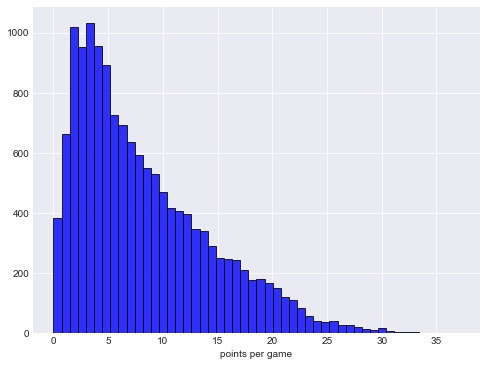

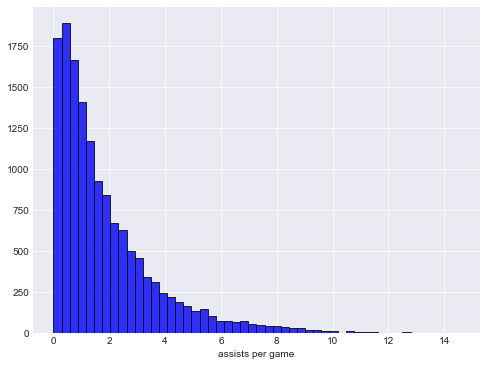

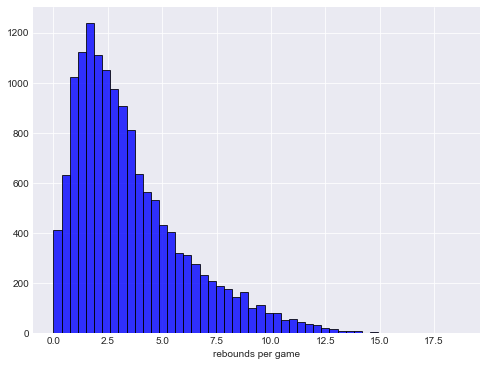

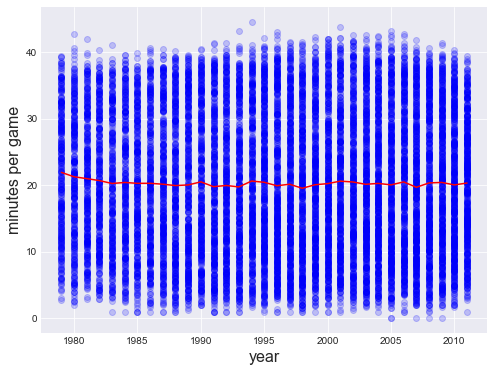

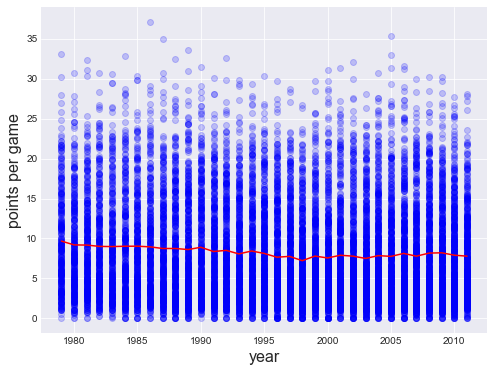

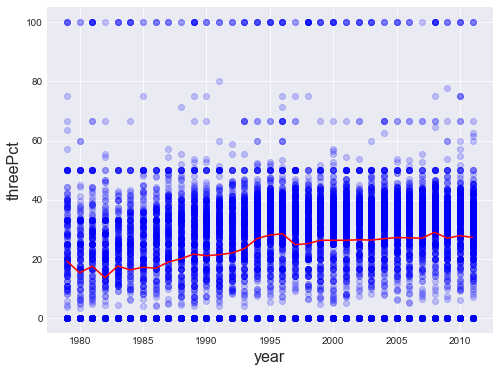

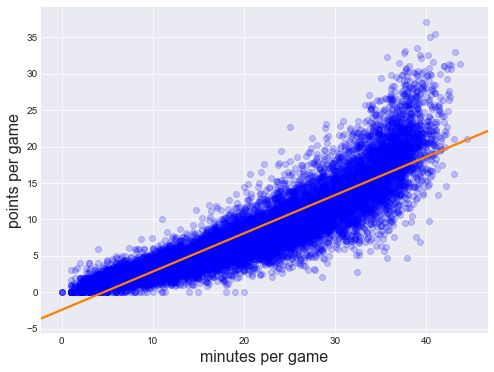

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


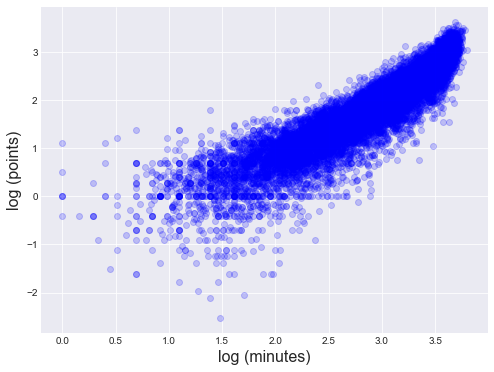

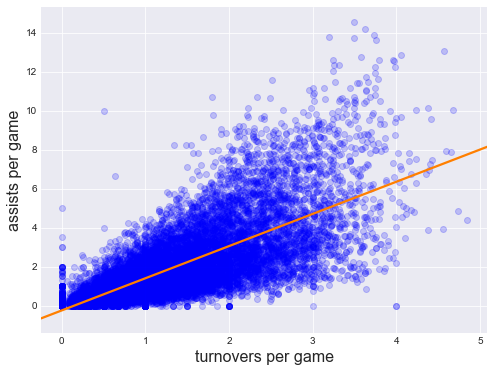

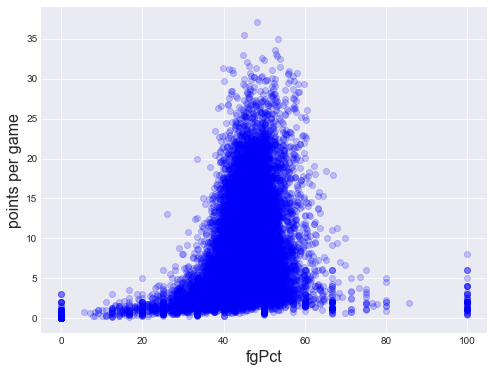

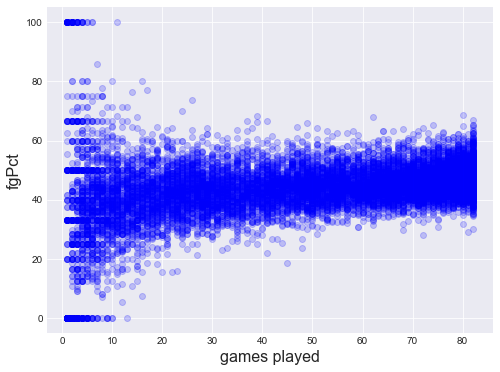

In [12]:
plot_hist('points')
plot_hist('assists')
plot_hist('rebounds')
plot_pg_stat('year', 'minutes', annualMean = True)
plot_pg_stat('year', 'points', annualMean = True)
plot_pg_stat('year', 'threePct', annualMean = True)
plot_pg_stat('minutes', 'points', regLine = True)
plot_pg_stat('minutes', 'points', logx = True, logy = True)
plot_pg_stat('turnovers', 'assists', regLine = True)
plot_pg_stat('fgPct', 'points')
plot_pg_stat('GP', 'fgPct')

In [13]:
# select only All-NBA Team awards
allNBA = awards[awards['award'].str.contains('All-NBA')]

# select only players awarded regular season MVP
seasonMVP = awards[awards['award'] == 'Most Valuable Player']

# select only players awarded Defensive Player of the Year
seasonDPY = awards[awards['award'] == 'Defensive Player of the Year']

In [14]:
# join playersPG and allNBA according to playerID and year
playersMerged = pd.merge(playersPG, seasonMVP, how='left', on=['playerID','year'])
playersMerged.rename(columns={'award': 'MVP'}, inplace=True)
playersMerged = pd.merge(playersMerged, seasonDPY, how='left', on=['playerID','year'])
playersMerged.rename(columns={'award': 'DPY'}, inplace=True)
playersMerged = pd.merge(playersMerged, allNBA, how='left', on=['playerID','year'])
playersMerged.rename(columns={'award': 'allNBA'}, inplace=True)

In [15]:
# determine total number of players with awards in the dataset
print(playersMerged['allNBA'].value_counts(), '\n')
print(playersMerged['MVP'].value_counts(), '\n')
print(playersMerged['DPY'].value_counts())

All-NBA Second Team    166
All-NBA First Team     165
All-NBA Third Team     123
Name: allNBA, dtype: int64 

Most Valuable Player    33
Name: MVP, dtype: int64 

Defensive Player of the Year    31
Name: DPY, dtype: int64


In [16]:
# convert awards columns to categorial (1: player received award, 0: no award)
playersMerged['allNBA'] = playersMerged['allNBA'].notnull().astype(int)
playersMerged['MVP'] = playersMerged['MVP'].notnull().astype(int)
playersMerged['DPY'] = playersMerged['DPY'].notnull().astype(int)

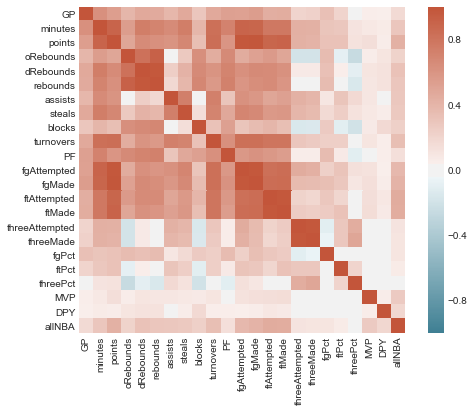

In [17]:
# visualise correlation matrix
corMatrix = playersMerged.iloc[:,2:].corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corMatrix, ax = ax, vmin = -1, vmax = 1, mask = np.zeros_like(corMatrix, dtype = np.bool),
            cmap = sns.diverging_palette(220, 20, as_cmap = True), square = True)
#heatmap code source: https://stackoverflow.com/a/42977946/8452935
plt.show()

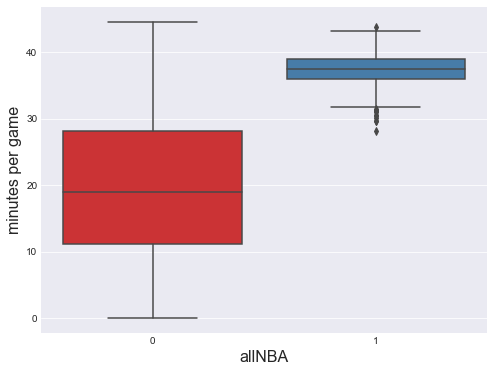

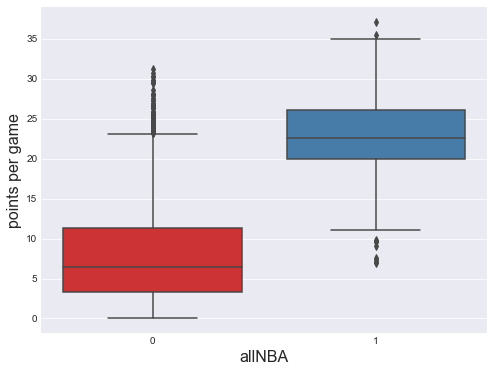

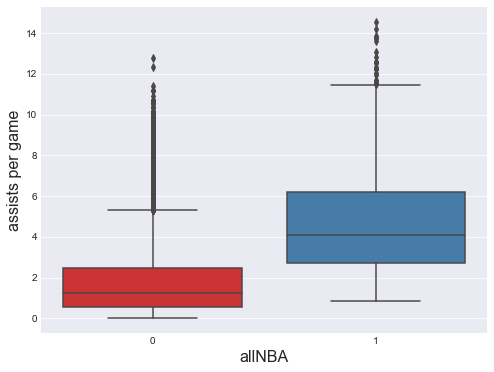

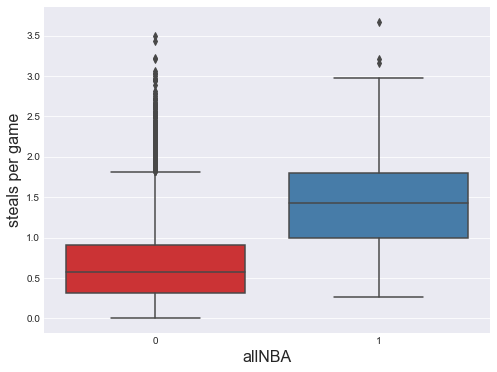

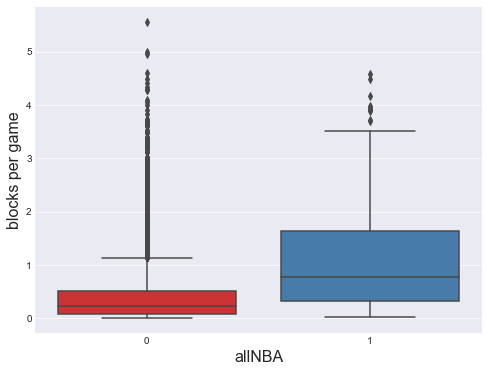

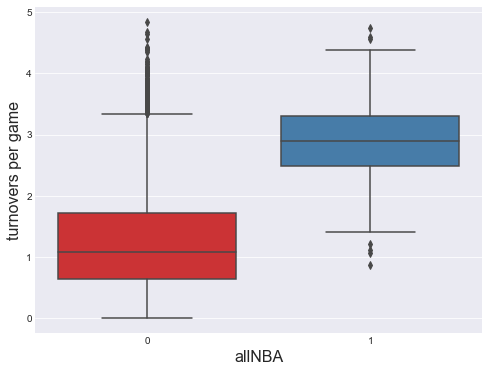

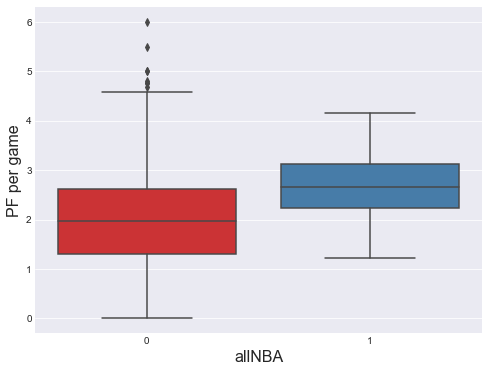

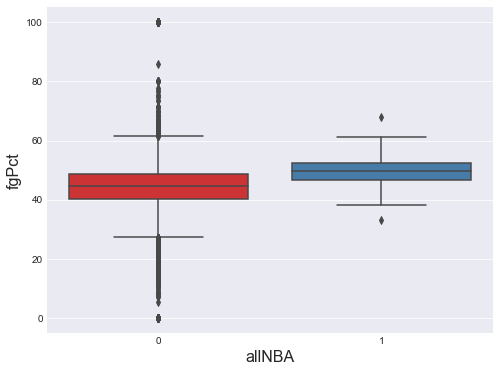

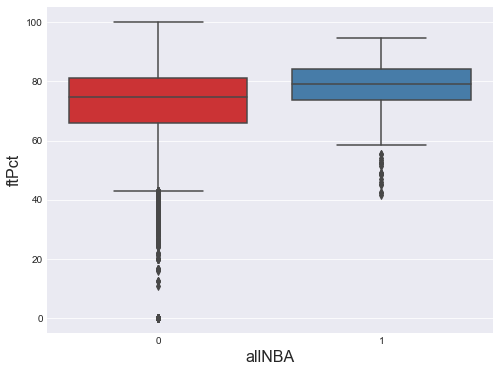

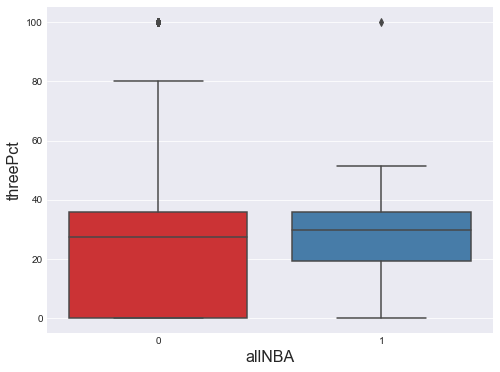

In [18]:
# plotting player stats grouped by players with awards and players without awards
def stats_awards_boxplot(var, award = "allNBA"):
    # var is the variable of interest
    # award is the name of the award to categorise by (either allNBA, MVP or DPY)
    # award defaults to allNBA if not specified
    # all variables take strings as inputs
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(x = award, y = var, data = playersMerged, palette = "Set1")
    ax.set_xlabel(award, fontsize = 16)
    if 'Pct' in var:
        ax.set_ylabel(var, fontsize = 16)
    elif var == 'GP':
        ax.set_ylabel('games played', fontsize = 16)
    else:
        ax.set_ylabel(var + ' per game', fontsize = 16)
    plt.show()

for s in stats:
    if 'rebounds' in s.lower():
        continue    # ignore rebounds (see below)
    elif 'Attempted' in s:
        continue    # ignore fg, fg, three attempts (see below)
    elif 'Made' in s:
        continue    # ignore fg, fg, three made (see below)
    else:
        stats_awards_boxplot(s)

stats_awards_boxplot('fgPct')
stats_awards_boxplot('ftPct')
stats_awards_boxplot('threePct')

In [19]:
# number of players with each award in each year
print(playersMerged[playersMerged['allNBA'] == 1].groupby('year')['allNBA'].sum())
print(playersMerged[playersMerged['MVP'] == 1].groupby('year')['MVP'].sum())
print(playersMerged[playersMerged['DPY'] == 1].groupby('year')['DPY'].sum())
# this has to be addressed before building the model
# consider merging awards to players dataset before computing per game averages

year
1979    10
1980    10
1981    10
1982    10
1983    10
1984    10
1985    10
1986    10
1987    10
1988    15
1989    15
1990    15
1991    15
1992    15
1993    16
1994    16
1995    15
1996    15
1997    15
1998    15
1999    15
2000    16
2001    15
2002    15
2003    15
2004    15
2005    15
2006    15
2007    15
2008    16
2009    15
2010    15
2011    15
Name: allNBA, dtype: int64
year
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
Name: MVP, dtype: int64
year
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    2
2001    1
2002    1
2003    1
2004    1
2005    1
2